In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import subprocess
import matplotlib.cm

sns.set_theme(style='darkgrid')

In [7]:
n_thr = np.array((1, 2, 4, 8, 16)).astype(int)
int_range = np.arange(16, 10000000, 100000)

In [3]:
time = np.zeros((5, len(int_range)))
i = 0
j = 0
for cnt in n_thr:
    for size in int_range:
        completed = subprocess.run(["/home/nikita/infa/test", str(size), str(cnt)],
                               capture_output=True) 
        time[j, i] = int(completed.stdout)
        i+=1
    i = 0
    j+=1

In [32]:
data = pd.DataFrame(np.hstack([np.vstack([time[i], int_range, (np.ones(len(int_range))*n_thr[i])]) for i in range(time.shape[0])]).T,
                   columns=['time(s*10^-6)', 'n_segments', 'n_threads'], dtype=int)

In [33]:
data.head()

,time(s*10^-6),n_segments,n_threads
0,334,16,1
1,2810,100016,1
2,4689,200016,1
3,6916,300016,1
4,7976,400016,1


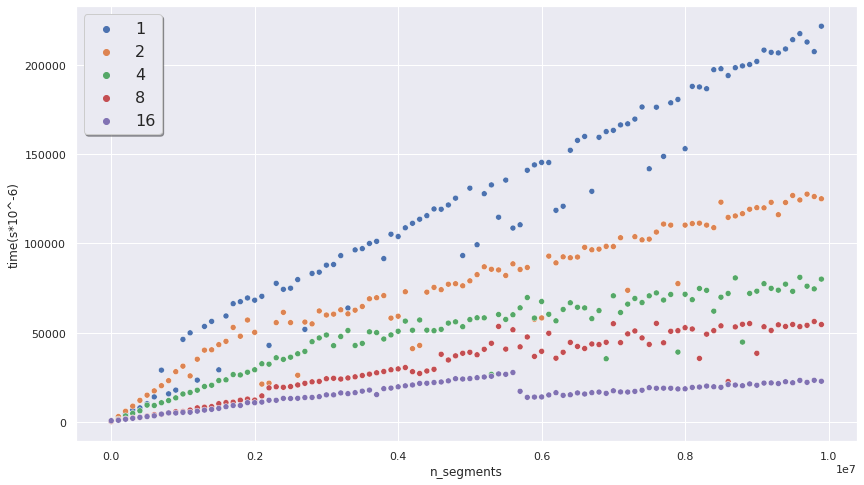

In [34]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.scatterplot(data=data, x='n_segments', y='time(s*10^-6)', hue='n_threads', palette='deep')
ax.legend(shadow=True, fontsize=16)
plt.show()